In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats  # For mode calculation

In [3]:
df = pd.read_csv(r"C:\Users\raulo\Desktop\ze_vids\tracks_and_labels\Top+Front\Joinned\all_top+front_imputed.csv")
df_frame = pd.read_csv(r"C:\Users\raulo\Desktop\ze_vids\tracks_and_labels\Top+Front\Joinned\joinned_label+track_top+front.csv")

In [4]:
df["Behavior"].value_counts()

Background     419838
interaction     73498
posing            949
jolts             153
TS                 16
Name: Behavior, dtype: int64

In [5]:
# Create a new DataFrame to store the results
new_df = pd.DataFrame()

# Add relevant data to the new DataFrame
new_df["Behavior"] = df['Behavior']

new_df['Client_Mouth_X_top'] = df['Client_Mouth']
new_df['Client_Mouth_Y_top'] = df['Client_Mouth.1']

new_df['Client_S1_X_top'] = df['Client_Spine_1']
new_df['Client_S1_Y_top'] = df['Client_Spine_1.1']

new_df['Client_S2_X_top'] = df['Client_Spine_2']
new_df['Client_S2_Y_top'] = df['Client_Spine_2.1']

new_df['Client_Tail_X_top'] = df['Client_Tail']
new_df['Client_Tail_Y_top'] = df['Client_Tail.1']

new_df['Cleaner_Mouth_X_top'] = df['Cleaner_Mouth']
new_df['Cleaner_Mouth_Y_top'] = df['Cleaner_Mouth.1']

new_df['Cleaner_Spine1_X_top'] = df['Cleaner_Spine1']
new_df['Cleaner_Spine1_Y_top'] = df['Cleaner_Spine1.1']

new_df['Cleaner_Spine2_X_top'] = df['Cleaner_Spine2']
new_df['Cleaner_Spine2_Y_top'] = df['Cleaner_Spine2.1']

new_df['Cleaner_Tail_X_top'] = df['Cleaner_Tail']
new_df['Cleaner_Tail_Y_top'] = df['Cleaner_Tail.1']

new_df["Frame"] = df_frame['Frame'] #add column with frames

In [6]:
# Create a new column in new_df to store the centroid for each row
new_df['Client_Centroid_X'] = new_df[['Client_Mouth_X_top', 'Client_S1_X_top', 'Client_S2_X_top', 'Client_Tail_X_top']].mean(axis=1)
new_df['Client_Centroid_Y'] = new_df[['Client_Mouth_Y_top', 'Client_S1_Y_top', 'Client_S2_Y_top', 'Client_Tail_Y_top']].mean(axis=1)

In [7]:
# Create a new column in new_df to store the centroid for each row
new_df['Cleaner_Centroid_X'] = new_df[['Cleaner_Mouth_X_top', 'Cleaner_Spine1_X_top', 'Cleaner_Spine2_X_top', 'Cleaner_Tail_X_top']].mean(axis=1)
new_df['Cleaner_Centroid_Y'] = new_df[['Cleaner_Mouth_Y_top', 'Cleaner_Spine1_Y_top', 'Cleaner_Spine2_Y_top', 'Cleaner_Tail_Y_top']].mean(axis=1)

In [8]:
# Calculate the Euclidean distance between the two centroids for each row
new_df['Distance'] = np.sqrt(
    (new_df['Client_Centroid_X'] - new_df['Cleaner_Centroid_X'])**2 +
    (new_df['Client_Centroid_Y'] - new_df['Cleaner_Centroid_Y'])**2
)

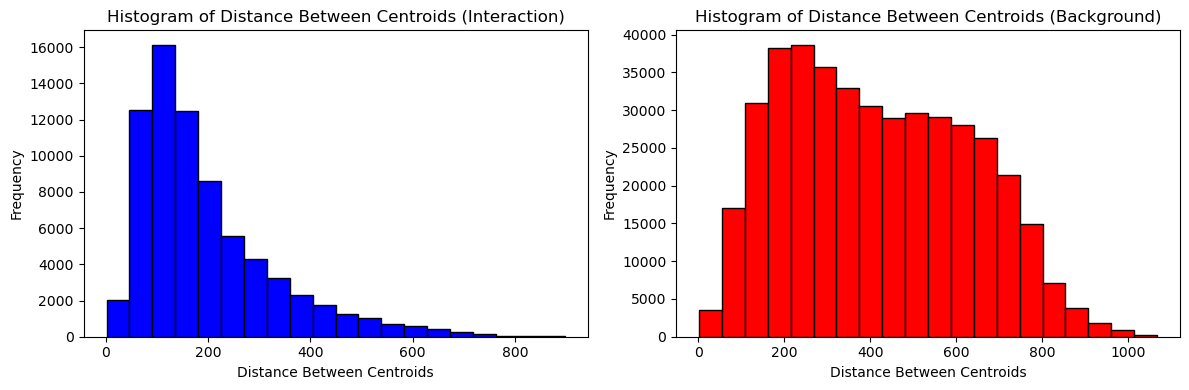

In [9]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first histogram (interaction)
ax1.hist(new_df[new_df['Behavior'] == 'interaction']['Distance'], bins=20, edgecolor='black', color='blue')
ax1.set_xlabel('Distance Between Centroids')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Distance Between Centroids (Interaction)')

# Plot the second histogram (non-interaction)
ax2.hist(new_df[new_df['Behavior'] == 'Background']['Distance'], bins=20, edgecolor='black', color='red')
ax2.set_xlabel('Distance Between Centroids')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Distance Between Centroids (Background)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
plt.show()

In [10]:
new_df

,Behavior,Client_Mouth_X_top,Client_Mouth_Y_top,Client_S1_X_top,Client_S1_Y_top,Client_S2_X_top,Client_S2_Y_top,Client_Tail_X_top,Client_Tail_Y_top,Cleaner_Mouth_X_top,...,Cleaner_Spine2_X_top,Cleaner_Spine2_Y_top,Cleaner_Tail_X_top,Cleaner_Tail_Y_top,Frame,Client_Centroid_X,Client_Centroid_Y,Cleaner_Centroid_X,Cleaner_Centroid_Y,Distance
0,Background,1308.093,419.526,1346.876,426.760,1403.251,427.585,1432.272,409.736,1189.107,...,1268.307,917.017,1282.976,924.739,25251.0,1372.62300,420.90175,1241.82950,915.11000,511.222783
1,Background,1301.067,414.470,1340.332,426.760,1388.009,420.569,1417.210,409.034,1178.946,...,1258.767,917.017,1275.454,924.739,25252.0,1361.65450,417.70825,1232.96375,912.63100,511.380326
2,Background,1269.530,414.470,1298.572,426.760,1364.604,420.569,1393.808,409.034,1173.344,...,1236.992,923.606,1275.454,930.310,25255.0,1331.62850,417.70825,1222.79100,915.67100,509.718061
3,Background,1264.340,406.180,1298.261,426.760,1348.578,428.476,1380.832,411.123,1154.575,...,1232.213,923.784,1259.884,930.310,25256.0,1323.00275,418.13475,1210.65650,915.71550,510.106148
4,Background,1259.199,406.180,1292.935,426.186,1340.558,428.476,1380.832,420.925,1131.399,...,1210.947,923.606,1243.329,924.739,25257.0,1318.38100,420.44175,1189.16800,916.90925,513.006801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494449,Background,298.287,742.995,260.575,796.450,225.504,827.783,198.142,826.049,845.065,...,835.570,283.475,806.698,321.148,168761.0,245.62700,798.31925,832.83700,256.28975,799.131756
494450,Background,295.017,738.109,260.144,796.450,226.543,827.935,198.066,826.051,845.065,...,843.247,268.478,817.811,311.338,168762.0,244.94250,797.13625,838.83125,244.95700,810.928956
494451,Background,293.875,735.024,260.144,796.215,227.233,827.935,201.079,826.177,843.685,...,847.258,262.442,820.818,306.764,168765.0,245.58275,796.33775,840.66450,239.70475,814.838994
494452,Background,289.687,733.892,260.144,795.015,227.266,827.935,200.968,826.417,843.685,...,852.580,251.502,832.998,300.703,168766.0,244.51625,795.81475,845.04000,232.80100,823.172678


In [11]:
def detect_interactions(distances, min_consecutive=60, threshold=175):
    """
    Detect interactions in a sequence of distances.

    Parameters:
        distances (list or numpy array): A sequence of distances.
        min_consecutive (int): Minimum consecutive frames required for an interaction.
        threshold (float): Threshold value to determine an interaction.

    Returns:
        List of tuples where each tuple represents an interaction (start_frame, end_frame).
    """
    interactions = []
    current_start = None

    for i, distance in enumerate(distances):
        if distance < threshold:
            if current_start is None:
                current_start = i
        else:
            if current_start is not None:
                if i - current_start >= min_consecutive:
                    interactions.append((current_start, i - 1))
                current_start = None

    # Check if an interaction is ongoing at the end of the sequence
    if current_start is not None and len(distances) - current_start >= min_consecutive:
        interactions.append((current_start, len(distances) - 1))

    return interactions

In [12]:
total_frames = 0
correctly_detected_event = 0
total = 0
correctly_frame_count = 0

# Initialize the "Interaction_Predictions" column with a default value
new_df["Interaction_Predictions"] = "background"

interactions = detect_interactions(new_df["Distance"])

for interaction in interactions:
    
    start_frame, end_frame = interaction
    
    if end_frame - start_frame + 1 >= 15:
        total += 1  # Increment the total count for eligible interactions
        total_frames += end_frame - start_frame + 1
        selected_data = new_df.loc[start_frame:end_frame, "Behavior"]
        mode_value = stats.mode(selected_data).mode[0]
        
        if mode_value == "interaction":
            correctly_detected_event +=1
            correctly_frame_count += end_frame - start_frame + 1
            
            
        # Store the prediction in the new column
        new_df.loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value

        print(f"Interaction detected from frame {start_frame} to {end_frame} (Duration: {end_frame - start_frame + 1} frames) with a true Behavior of {mode_value}")

Interaction detected from frame 1607 to 1695 (Duration: 89 frames) with a true Behavior of interaction
Interaction detected from frame 1722 to 1801 (Duration: 80 frames) with a true Behavior of interaction
Interaction detected from frame 2071 to 2131 (Duration: 61 frames) with a true Behavior of interaction
Interaction detected from frame 2483 to 2543 (Duration: 61 frames) with a true Behavior of interaction
Interaction detected from frame 2571 to 2692 (Duration: 122 frames) with a true Behavior of interaction
Interaction detected from frame 4248 to 4413 (Duration: 166 frames) with a true Behavior of interaction
Interaction detected from frame 5190 to 5258 (Duration: 69 frames) with a true Behavior of interaction
Interaction detected from frame 5334 to 5461 (Duration: 128 frames) with a true Behavior of interaction
Interaction detected from frame 6843 to 6930 (Duration: 88 frames) with a true Behavior of interaction
Interaction detected from frame 6997 to 7116 (Duration: 120 frames) wi

C:\Users\raulo\AppData\Local\Temp\ipykernel_3888\3749368743.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = stats.mode(selected_data).mode[0]
C:\Users\raulo\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\raulo\AppData\Local\Temp\ipykernel_3888\3749368743.py:19: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see 

In [13]:
print(f"There was {correctly_frame_count} frames correclty classified, and a total of {total_frames} frames classified as interaction.")
print(f"Making this a {correctly_frame_count/total_frames *100} % accuracy.")
print(f"There was a total of {correctly_detected_event} events detected correctly. With a total of {total} events detected.")

There was 31055 frames correclty classified, and a total of 47687 frames classified as interaction.
Making this a 65.12257009247804 % accuracy.
There was a total of 242 events detected correctly. With a total of 415 events detected.


In [14]:
df["Behavior"].value_counts()

Background     419838
interaction     73498
posing            949
jolts             153
TS                 16
Name: Behavior, dtype: int64

In [16]:
# Initialize variables
group_count = 0
prev_behavior = None

# Function to check if a behavior is an interaction
def is_interaction(behavior):
    return behavior == "interaction"

# Loop through the DataFrame to count interaction groups
for behavior in df["Behavior"]:
    if is_interaction(behavior):
        if prev_behavior == "Background":
            group_count += 1
    prev_behavior = behavior

print("Number of interaction groups:", group_count)

Number of interaction groups: 326
